# <span style="color:#E18C12">0. Imports</span> 

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# <span style="color:#E18C12">1. Classification Metrics</span>

- Measuring model performance with accuracy:
    + Fraction of correctly classified samples
    + Not always a useful metric

- One example: <span style="color:blue"><b>class imbalance</b></span>
    + Imagine you need to classify an e-mail as spam or not-spam:
        + 99% of emails in your data set are real; 1% of emails are spam
        + Could build a classifier that predicts ALL emails as real.
        + It would be 99% accurate!
        + But horriblw at actually classyfing spam

So, we need more nuanced metrics.
        

**CONFUSION MATRIX**

|                  | Predicted: Spam| Predicted: Not Spam  |                   |
|:----------------:|:--------------:|:-------------------:|:-------------------:|
| **Actual: Spam**     |  <span style="color:green">True Positive</span>  |<span style="color:red">False Negative</span> | tp + fn
| **Actual: Not Spam** |  <span style="color:red">False Positive</span> | <span style="color:green">True Negative</span>| fp + tn
| |tp + fp|fn + tn|tp + fn + fp + tn|

- Accuracy

$$
\dfrac{tp + tn}{tp + tn + fp + fn}
$$

## <span style="color:#12CBE1">1.1. Metrics from the confusion matrix</span>

- Precision = $\dfrac{tp}{tp + fp}$



- Recall ou Sensitivity = $\dfrac{tp}{tp + fn}$



- F1 score = $ 2 \cdot \dfrac{precision \times recall}{precision + recall}$

- **High precision**: Not many real emails predicted as spam
- **High recall**: Predicted most spam emails correctly 

## <span style="color:#12CBE1">1.2. Confusion matrix in scikit-learn</span>

```python
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Classifier
knn = KNeighborsClassifier(n_neighbors=8)

# Split into train an test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

# Confusio nmatrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

## <span style="color:#12CBE1">1.3. Exercise</span>


> ### 1. Metrics for classification

In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

**Steps**

- Import `classification_report` and `confusion_matrix` from `sklearn.metrics`.
- Create training and testing sets with 40% of the data used for testing. Use a random state of `42`.
- Instantiate a k-NN classifier with `6` neighbors, fit it to the training data, and predict the labels of the test set.
- Compute and print the confusion matrix and classification report using the `confusion_matrix()` and `classification_report()` functions.

In [5]:
# Imports
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Data
url_diabetes = "https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv"
diabetes = pd.read_csv(url_diabetes)
diabetes.head()

# X and y
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [14]:
# Import necessary modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



# <span style="color:#E18C12">2. Logistic Regression and the ROC curve</span>

In [2]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

```python
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
```

default threshold = 0.5

##  <span style="color:#12CBE1">2.1. Plotting the ROC curve</span>

```python
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logidtic Regression ROC Curve')
plt.show();
```

##  <span style="color:#12CBE1">2.2. Exercises</span>

> ### 1. Building a logistic regression model

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y have been pre-loaded, and `train_test_split` has been imported for you from `sklearn.model_selection`.

**Steps**
- Import:
    + `LogisticRegression` from `sklearn.linear_model`.
    + `confusion_matrix` and `classification_report` from `sklearn.metrics`.
- Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
- Instantiate a `LogisticRegression` classifier called `logreg`.
- Fit the classifier to the training data and predict the labels of the test set.
- Compute and print the confusion matrix and classification report. This has been done for you, so hit submit to see how logistic regression compares to k-NN!

In [6]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> ### 2. Plotting an ROC curve

Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

**Steps**

- Import `roc_curve` from `sklearn.metrics`.
- Using the `logreg` classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set `X_test`. Save the result as `y_pred_prob`.
- Use the `roc_curve()` function with `y_test` and `y_pred_prob` and unpack the result into the variables `fpr`, `tpr`, and `thresholds`.
- Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.

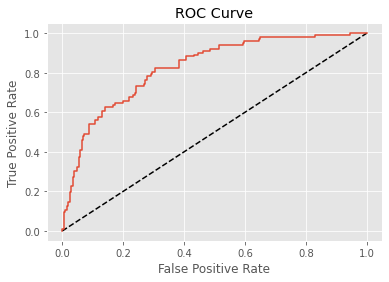

In [8]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

> ### 3. Precision-recall Curve


<img style="float: right;" src="images/precision_recall_curve.svg">

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

 
$$
Precision = \dfrac{TP}{TP + FP}
$$


$$
Recall = \dfrac{TP}{TP + FN}
$$
 

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

```python
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308

[[176  30]
 [ 35  67]]
``` 

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

### Possible Answers

**A)** A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.✅

**B)** Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.✅

**C)** When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.✅

**D)** Precision and recall take true negatives into consideration. ❌

# <span style="color:#E18C12">3. Area under the ROC curve</span>